# LAB 6

Authors: $\lambda$ Justin Ventura [[jventura3@gulls.salisbury.edu]] & Blaine Mason $\lambda$

Date: Thursday, November 12th, 2020.

## - Description -

Supervised Learning: ** K-Nearest Neighbors **

In [6]:
# Libraries:
import numpy as np
import numpy.linalg as la
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


# Import iris the dataset:
iris = pd.read_csv('iris.data', names=['sep_length', 'sep_width', 'pet_length', 'pet_width', 'class'])
print('iris dataset shape: ', iris.shape)

# Import the adult dataset:
adult = pd.read_csv("adult.data", header=None,
                      skipinitialspace=True, # this data has some extra whitespace
                      names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                            ])
print('adult dataset shape: ', adult.shape)

iris dataset shape:  (150, 5)
adult dataset shape:  (32561, 15)


## K-Nearest Neighbor Implementation

In [18]:
# K-Nearest Neighbor Class.
class kNNModel:
    """ k-Nearest Neighbors Model Class.
    
    Uses training data in order to predict future values
    of new query points.
    """
    # kNN Model Constructor.
    def __init__(self, k: int=3, train_x=None):
        """ Initializes the training_data. [Constructor] 
        
        Args:
            k [int]: the number of neighbors the model should
                     use in the 'voting' system.

            train_x [list]: pre-labeled (class) training data.
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]
        """
        self.k = k
        self.training_data = train_x

    # Calculate the distances of each train point from the test point.
    def distances(self, test_x=None) -> list:
        """ Calculates the distance between the training data & test point. 
        NOTE: done in linear O(n) time.

        Args:
            test_x [float]: a specific value to be tested against the training
            data.
        """
        test = [t[0] for t in self.training_data]
        return np.array([la.norm(t - test_x, axis=0) for t in test])
    
    # Give the model training data.
    def train(self, train_x=None) -> None:
        """ Trains the model with pre-labelled data.
        
        Args:
            train_x [list]: the training data used to train model.
            * NOTE: if train_x is None, function immediately returns. *
            
            -> train_x format: list[list[tuple(<numeric-data>), class]]

        Returns:
            None.
        """
        if not self.training_data:
            self.training_data = train_x
        else:
            pass
        
    def predict(self, query_point):
        """ Uses the model in order to predict what to label the query point.
        
        Args:
            query_point [tuple(<numeric_data>)]: the point in which a class will
            be predicted for.
            
        Returns:
            'Class' [int]: The 'Class' will be the numeric class that this algorithm
                           deems closest to the possible classes it has been trained
                           to identify.
        """
        
        # TODO: use a k-d tree for O(logn) searches.  For now we can use the
        # naive O(n) "brute force" approach.
        point_class = [t[1] for t in self.training_data]
        dist = self.distances(query_point)
        dist = [(d, p) for d, p in zip(dist, point_class)]
        dist = sorted(dist)
        d = list()
        for i in range(self.k):
            d.append(dist[i][1])
        
        return int(stats.mode(d)[0])
    

NameError: name 'List' is not defined

## Testing

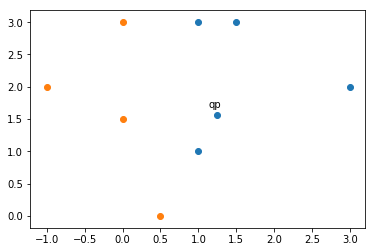

In [17]:
# Set up the training data.
train_points0 = [(3, 2), (1.5, 3), (1, 3), (1, 1)]
train_points0 = np.array([np.array(tup) for tup in train_points0])
train_points1 = [(-1, 2), (.5, 0), (0, 3), (0, 1.5)]
train_points1 = np.array([np.array(tup) for tup in train_points1])

# Classes for the points.
train_class0 = [0, 0, 0, 0]
train_class1 = [1, 1, 1, 1]

# Prepare the data to be loaded into the KNN model.
train_data0 = [[tup, c] for tup, c in zip(train_points0, train_class0)]
train_data1 = [[tup, c] for tup, c in zip(train_points1, train_class1)]
train_data = train_data0 + train_data1

Lambda = kNNModel(3, train_data)

X0 = [x for x, _ in train_points0]
Y0 = [y for _, y in train_points0]
X1 = [x for x, _ in train_points1]
Y1 = [y for _, y in train_points1]

query = 1.24, 1.57

if (Lambda.predict(query)) == 1:
    plt.scatter(query[0], query[1], c='tab:orange')
    plt.annotate('qp', (query[0] - 0.1, query[1] + 0.1))
else:
    plt.scatter(query[0], query[1], c='tab:blue')
    plt.annotate('qp',  (query[0] - 0.1, query[1] + 0.1))

plt.scatter(X0, Y0)  # training group 0
plt.scatter(X1, Y1)  # training group 1
plt.show()